# **1. LIBRERÍAS**


In [1]:
import pandas as pd #Para el manejo de dataframes
import numpy as np #Para trabajar con arrays y para realizar operaciones matemáticas y estadísticas básicas

# **2. CONJUNTO DE DATOS**


Los datos utilizados para este caso de uso están relacionados con los procesos de innovación de las empresas pertenecientes a las distintas ramas de actividad económica. En concreto, se utilizará la división A21 de la clasificación recogida por el CNAE 2009. El objetivo es realizar con ella un análisis exploratorio exhaustivo para poder observar características generales, similitudes y diferencias entre las distintas ramas de actividad estudiadas a través de modelos de análisis de datos.

In [5]:
from google.colab import files
uploaded = files.upload() # Importar el dataset

Saving Innovacion.xlsx to Innovacion.xlsx


In [6]:
datos=pd.read_excel('Innovacion.xlsx', sheet_name='Datos') # Para leer el dataset
datos.head() # Visualizar el dataset

,RAMA,YEAR,N_EMPRESAS,PRODUCCION,CI,VAB,REM_ASAL,IMPUESTOS,EBE_RM,PUESTOS,...,INTENSIDAD_INN,VENTAS_CE,COMPRAS_CE,ORDENADORES,ESPECIALISTAS,INTERNET,MEDIOS_SOCIALES,CLOUD,BIGDATA,SEGURIDAD
0,"D Suministro de energía eléctrica, gas, vapor ...",2015,14551,68975,43269,25706,2680,680,22346,39.1,...,0.3200,2.772119e+06,11159557.98,100.00,32.0800,99.8700,32.2200,20.8600,14.590,89.970
1,"E Suministro de agua, actividades de saneamien...",2015,6704,26518,15477,11041,6405,97,4539,183.5,...,0.4000,1.848080e+06,7439705.32,100.00,32.0800,99.8700,32.2200,20.8600,14.590,89.970
2,C Industria manufacturera,2015,174333,470328,348568,121760,62834,202,58724,1832.7,...,1.3402,1.050015e+08,66652631.64,98.89,27.6575,97.7025,35.1875,16.5375,5.155,86.495
3,F Construcción,2015,405849,124989,68567,56422,26421,1885,28116,1064.1,...,0.2400,8.076220e+05,836904.97,99.18,14.0800,98.9000,27.5000,11.0800,5.600,85.220
4,G Comercio al por mayor y al por menor; repara...,2015,763930,211486,88180,123306,67142,595,55569,3335.4,...,0.1000,6.517709e+07,92587690.10,99.46,24.4700,98.9200,49.3000,18.1900,7.870,90.670


In [7]:
num_filas = datos.shape[0]
num_columnas = datos.shape[1]
print("El DataFrame tiene", num_filas, "filas y", num_columnas, "columnas")

El DataFrame tiene 66 filas y 26 columnas


In [ ]:
datos.dtypes # Comprobar el tipo de variables que están incluídas en el dataset

RAMA                object
YEAR                 int64
N_EMPRESAS           int64
PRODUCCION           int64
CI                   int64
VAB                  int64
REM_ASAL             int64
IMPUESTOS            int64
EBE_RM               int64
PUESTOS            float64
HORAS              float64
CCFIJO               int64
FBK                float64
EMPRESAS_INN       float64
GASTOS_INN         float64
CIFRA_NEGOCIOS     float64
INTENSIDAD_INN     float64
VENTAS_CE          float64
COMPRAS_CE         float64
ORDENADORES        float64
ESPECIALISTAS      float64
INTERNET           float64
MEDIOS_SOCIALES    float64
CLOUD              float64
BIGDATA            float64
SEGURIDAD          float64
dtype: object

A la hora de importar los datos, para alguna de las variables, no se ha detectado bien el tipo de dato numérico que contenían (discreto o continuo) por lo que habrá que modificarlo:

In [ ]:
# Convertimos el tipo de datos numéricos de las variables correspondientes
datos[['PRODUCCION','CI','VAB','REM_ASAL','IMPUESTOS','EBE_RM','CCFIJO']] = datos[['PRODUCCION','CI','VAB','REM_ASAL','IMPUESTOS','EBE_RM','CCFIJO']].astype(float)
datos[['EMPRESAS_INN']] = datos[['EMPRESAS_INN']].astype(int)
datos.dtypes

RAMA                object
YEAR                 int64
N_EMPRESAS           int64
PRODUCCION         float64
CI                 float64
VAB                float64
REM_ASAL           float64
IMPUESTOS          float64
EBE_RM             float64
PUESTOS            float64
HORAS              float64
CCFIJO             float64
FBK                float64
EMPRESAS_INN         int64
GASTOS_INN         float64
CIFRA_NEGOCIOS     float64
INTENSIDAD_INN     float64
VENTAS_CE          float64
COMPRAS_CE         float64
ORDENADORES        float64
ESPECIALISTAS      float64
INTERNET           float64
MEDIOS_SOCIALES    float64
CLOUD              float64
BIGDATA            float64
SEGURIDAD          float64
dtype: object

Además, se comprobará si existen o no datos perdidos a través del siguiente gráfico:

<Axes: >

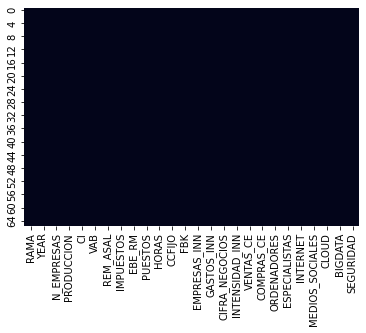

In [ ]:
import seaborn as sns
sns.heatmap(datos.isnull(), cbar=False) # Identificamos los missing values visualmente

Como el gráfico se muestra entero de color negro, se verifica la inexistencia de valores perdidos, lo que facilitará la tarea de depuración de datos. Si existiera algún dato perdido, sería representado en color blanco. 

# **3. ANÁLISIS DE COMPONENTES PRINCIPALES**

Una vez realizado el análisis exploratorio anterior sobre las variables del conjunto de datos, se plantea que técnicas multivariantes podrían utilizarse con el mismo. Sería lógico querer aplicar una regresión lineal para explicar y predecir la Intensidad de Innovación de cada uno de los sectores, las ventas por comercio electrónico o incluso la producción que generaría cada uno de ellos en función de la innovación. 

Sin embargo, la gran cantidad de información disponible, hace que exista un gran número de variables y por lo tanto es difícil poder visualizar relaciones entre ellas. Además, otro de los problemas que se presenta es la fuerte correlación que muchas veces se existe entre las variables. 

Por esta razón, se hace necesario reducir el número de variables intentando perder el mínimo de información posible. De esta forma, se estudian las relaciones entre p variables correlacionadas, es decir, que miden información común, y se transforman en otro conjunto de variables menor llamado **Conjunto de Componentes Principales** en el que no hay redundancia de información. Las nuevas variables serán combinaciones lineales de las originales y además estarán incorreladas, recogiendo así la mayor parte de información y variabilidad de los datos posible. Si las variables originales no estuvieran correladas entre sí, este análisis no tendría sentido. Otra de sus ventajas, es que no requiera la asunción de normalidad multivariantes de los datos, por lo que se puede aplicar facilmente a conjuntos de datos reales. 

In [ ]:
# Librerías para la preparación de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Librerías para el Modelado
from sklearn.decomposition import PCA 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Librerías para la Visualización 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Animación de gráficos
from IPython.display import Image
from matplotlib import animation

## ***3.1. PREPARACIÓN DEL CONJUNTO DE DATOS***

Comenzamos preparando el conjunto de datos:

In [ ]:
inn_sin_faltantes = datos
inn_sin_faltantes.insert(0, 'ID', range(1, len(inn_sin_faltantes) + 1))
inn_dat = inn_sin_faltantes.iloc[:,2:] # Eliminar la columna ID y guardar el resultado en inn_dat
inn_dat2 = inn_dat.iloc[:,1:] # Eliminar las columnas 1 y 2 y guardar el resultado en inn_dat2

Es importante crear así el dataframe para tener la primera columna alfanumérica, con el identificador del individuo (en este caso la rama de actividad en un año concreto), ya que más tarde se utilizará para las representaciones gráficas. También se crea la matriz inn_dat2 con solo los valores numéricos de las variables, eliminando la variable alfanumérica, necesaria como entrada para la función PCA.

## ***3.2. ESTADÍSTICOS DESCRIPTIVOS BÁSICOS***

In [ ]:
tabla1 = inn_dat2.describe()
from tabulate import tabulate
def print_stats(tabla1):
    print(tabulate(tabla1, headers='keys', tablefmt='fancy_grid'))
print_stats(tabla1)

╒═══════╤══════════════╤══════════════╤══════════╤══════════╤════════════╤═════════════╤══════════╤═══════════╤══════════════════╤══════════╤══════════╤════════════════╤══════════════════╤══════════════════╤══════════════════╤══════════════════╤══════════════════╤═══════════════╤═════════════════╤════════════╤═══════════════════╤═════════╤═══════════╤═════════════╕
│       │   N_EMPRESAS │   PRODUCCION │       CI │      VAB │   REM_ASAL │   IMPUESTOS │   EBE_RM │   PUESTOS │            HORAS │   CCFIJO │      FBK │   EMPRESAS_INN │       GASTOS_INN │   CIFRA_NEGOCIOS │   INTENSIDAD_INN │        VENTAS_CE │       COMPRAS_CE │   ORDENADORES │   ESPECIALISTAS │   INTERNET │   MEDIOS_SOCIALES │   CLOUD │   BIGDATA │   SEGURIDAD │
╞═══════╪══════════════╪══════════════╪══════════╪══════════╪════════════╪═════════════╪══════════╪═══════════╪══════════════════╪══════════╪══════════╪════════════════╪══════════════════╪══════════════════╪══════════════════╪══════════════════╪══════════════════╪

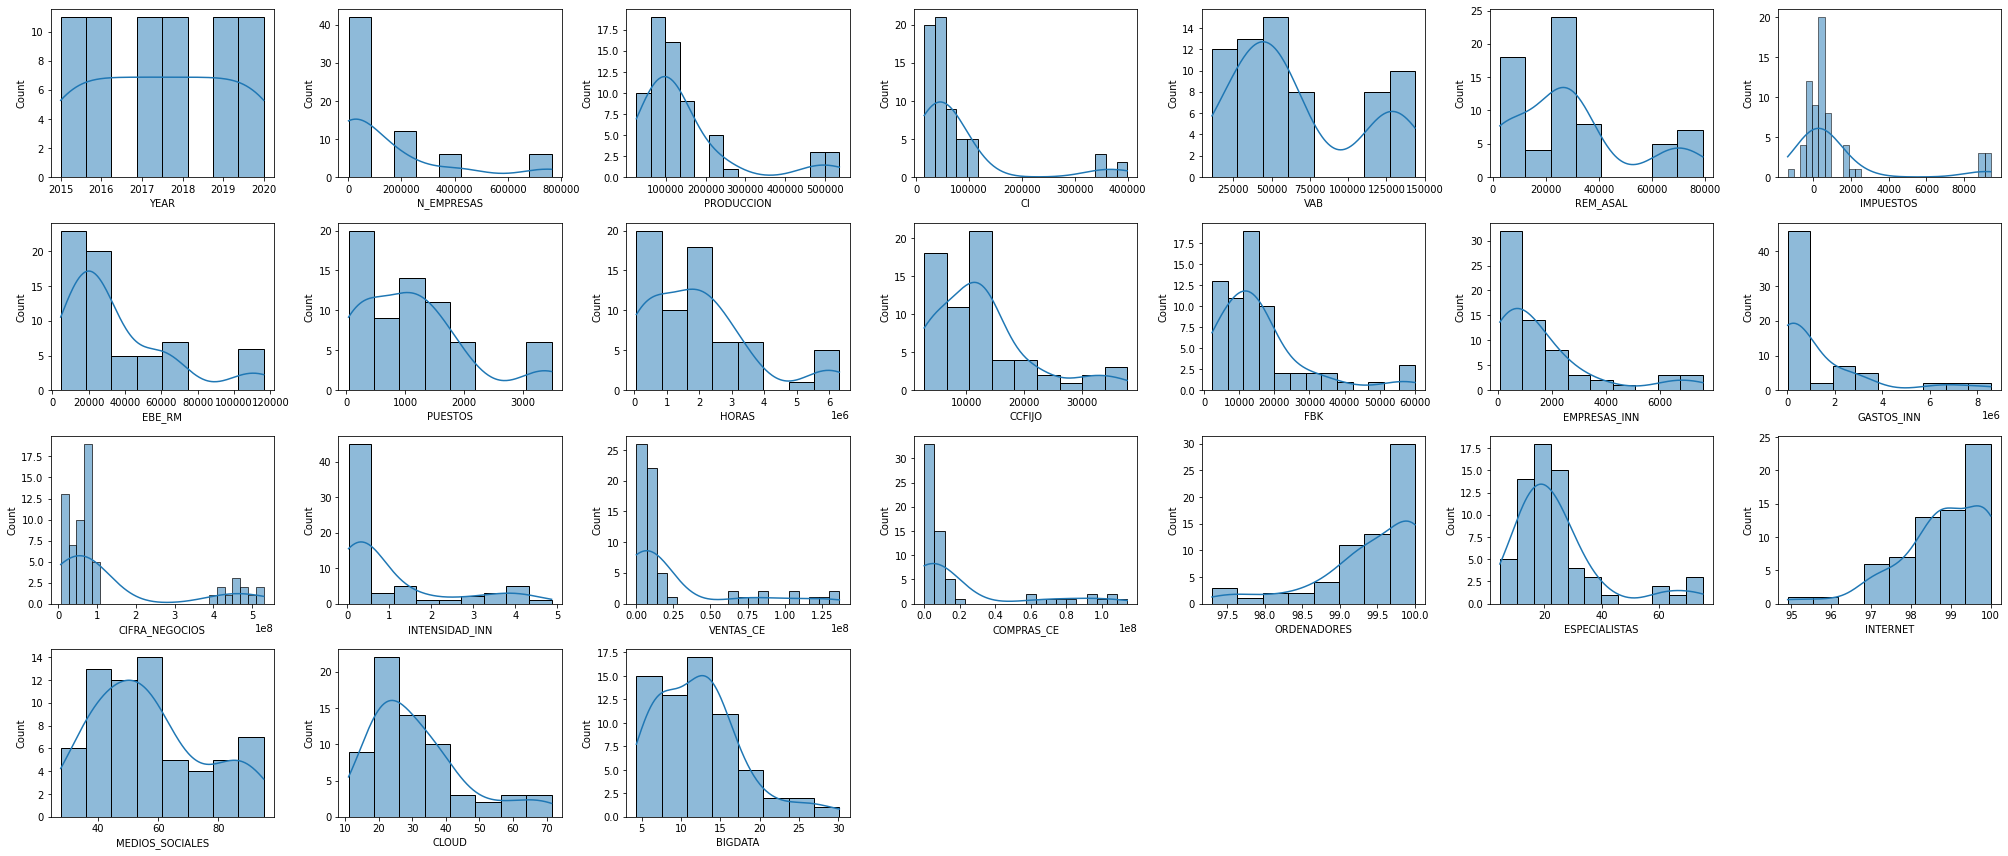

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

nrows, ncols = 4, 7 # Establecer el número de columnas y filas en el subplot

fig = plt.figure(figsize=(4*ncols, 3*nrows))
gs = GridSpec(nrows, ncols, figure=fig)

# Crear un bucle para crear múltiples histogramas
for i, col in enumerate(datos.iloc[:,2:9]):
    ax = fig.add_subplot(gs[0, i])
    sns.histplot(datos[col], kde=True, ax=ax, alpha=0.5)

for i, col in enumerate(datos.iloc[:,9:16]):
    ax = fig.add_subplot(gs[1, i])
    sns.histplot(datos[col], kde=True, ax=ax, alpha=0.5)

for i, col in enumerate(datos.iloc[:,16:23]):
    ax = fig.add_subplot(gs[2, i])
    sns.histplot(datos[col], kde=True, ax=ax, alpha=0.5)

for i, col in enumerate(datos.iloc[:,23:26]):
    if i < 7:
        ax = fig.add_subplot(gs[3, i])
        sns.histplot(datos[col], kde=True, ax=ax, alpha=0.5)

# Ajustar los espacios entre los subplots
plt.tight_layout()

# Mostrar los histogramas con densidad
plt.show()

## ***3.3. MATRIZ DE CORRELACIONES***

Para comprobar si las variables están relacionadas de forma lineal entre ellas, se calcula la matriz de correlaciones y se guarda. Además, se representará con un mapa de calor para poder interpretarla mejor.

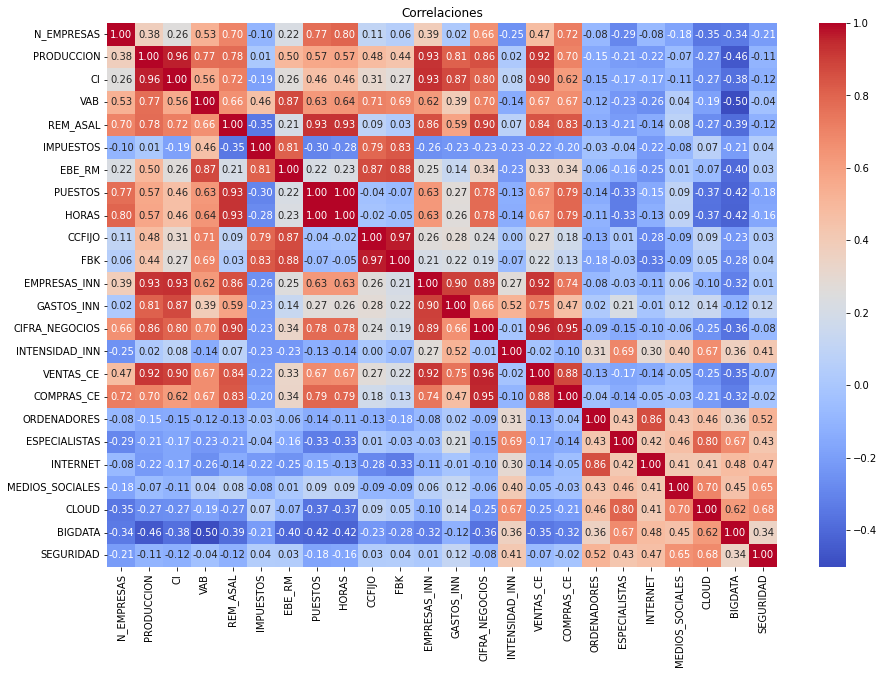

In [ ]:
R = inn_dat2.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(R, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlaciones')
plt.show()

Este gráfico se interpreta de la siguiente manera:
- Las variables representadas en color rojo más intenso son aquellas que tienen una alta correlación positiva entre ellas.
- Las variables representadas en color azul más intenso son aquellas que tienen una alta correlación negativa entre ellas.
- Las variables representadas en colores azules claros son aquellas que tienen menor relación entre ellas.

A modo de ejemplo se ilustran algunas de las relaciones entre variables:
- Las variables de Contabilidad Nacional (PRODUCCION, CI,VAB, REM_SAL, PUESTOS, HORAS, CCFIJO...) tienen en mayor o menor medida una alta correlación positiva, es decir, cuando aumenta una aumenta la otra. Esto nos ofrece una idea sobre que en aquellas ramas de actividad en las que los valores de la PRODUCCION son altos, el resto de variables relacionadas con la Contabilidad Nacional también tomarán valores altos.
- Las variables sobre el uso de las TIC también tienen una alta correlación entre sí. La interpretación sería que aquellas ramas de actividad en las que muchas empresas disponen de ORDENADORES, ESPECIALISTAS o INTERNET provoca que también haya muchas de ellas que inviertan en servicios de CLOUD, BIGDATA, MEDIOS SOCIALES o SEGURIDAD.
- Las variables sobre CE (Comercio Electrónico) están muy relacionadas tanto con algunas variables de Contabilidad Nacional como con variables referentes a los procesos de innovación. Esto implica que en aquellas ramas de actividad en las que haya más VENTAS_CE o COMPRAS_CE tendrán valores altos tanto para variables de Contabilidad Nacional como para los indicadores de innovación como pueden ser el GASTO_INN o la INTENSIDAD_INN. 
- También se observan algunas correlaciones negativas entre algunas de las variables, pero fijándonos realmente en su coeficiente vemos que suele tener valores más bajos en la gran mayoría de los casos comparándo con las correlaciones positivas.

## ***3.4. ENCONTRAR LAS COMPONENTES PRINCIPALES***

Para encontrar las componentes principales, partiendo de la matriz de correlaciones o de la matriz de varianzas-covarianzas estimadas, se hallará su descomposición, en función de sus valores propios y la matriz formada por sus autovectores correspondientes. 

Antes de nada, se deben estandarizar las variables con el objetivo de poder comparar y analizar aquellas que tienen diferentes escala o unidades de medida ya que tener variables medidas en diferentes escalas podría afectar a la interpretación de los resultados o hacer que algunas variables tengan un mayor peso en el análisis simplemente porque tienen una escala más grande. La estandarización ayuda a evitar este problema haciendo que las variables tengan media 0 y desviación estándar de 1 y por lo tanto que todas las variables estén medidas en la misma escala y unidad de medida. 

In [ ]:
# Escalar los datos
scaler = StandardScaler()
inn_dat2_scaled = scaler.fit_transform(inn_dat2)

# Configurar la visualización de gráficos
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Ajustar el modelo PCA
fit = PCA(n_components=24)
fit_transformed = fit.fit_transform(inn_dat2_scaled)

# Tabla de autovalores 
eig_df = pd.DataFrame({'Autovalores': fit.explained_variance_, 
                       'Porcentaje de varianza explicada': fit.explained_variance_ratio_,
                       'Porcentaje acumulado de varianza explicada': fit.explained_variance_ratio_.cumsum()})
from tabulate import tabulate
def print_stats(eig_df):
    print(tabulate(eig_df, headers='keys', tablefmt='fancy_grid'))
print_stats(eig_df)

╒════╤═══════════════╤════════════════════════════════════╤══════════════════════════════════════════════╕
│    │   Autovalores │   Porcentaje de varianza explicada │   Porcentaje acumulado de varianza explicada │
╞════╪═══════════════╪════════════════════════════════════╪══════════════════════════════════════════════╡
│  0 │   9.87125     │                        0.40507     │                                     0.40507  │
├────┼───────────────┼────────────────────────────────────┼──────────────────────────────────────────────┤
│  1 │   4.64054     │                        0.190426    │                                     0.595496 │
├────┼───────────────┼────────────────────────────────────┼──────────────────────────────────────────────┤
│  2 │   4.03408     │                        0.16554     │                                     0.761036 │
├────┼───────────────┼────────────────────────────────────┼──────────────────────────────────────────────┤
│  3 │   2.06716     │               

Esta es la tabla de autovalores asociada al análisis de componentes principales llevado a cabo. Los autovalores suman p (diagonal de la matriz R), es decir, el número de variables original del conjunto de datos. De esta forma, el primer autovalor explica el 40.51% de la varianza total (9.72/24*100=40.51%). Con dos autovalores explicamos el 59.55% de la varianza total, con tres el 76.1% y así sucesivamente hasta llegar al autovalor 24 (se generán tantos autovalores como variables - 1) en el que se explica el 100% de la varianza total de las variables.

In [ ]:
# Tabla de autovectores
autovectores_df = pd.DataFrame(fit.components_.T, columns=['Autovector {}'.format(i+1) for i in range(fit.components_.shape[0])], index=inn_dat2.columns)
from tabulate import tabulate
def print_stats(autovectores_df):
    print(tabulate(autovectores_df, headers='keys', tablefmt='fancy_grid'))
print_stats(autovectores_df)

╒═════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╤═════════════════╕
│                 │   Autovector 1 │   Autovector 2 │   Autovector 3 │   Autovector 4 │   Autovector 5 │   Autovector 6 │   Autovector 7 │   Autovector 8 │   Autovector 9 │   Autovector 10 │   Autovector 11 │   Autovector 12 │   Autovector 13 │   Autovector 14 │   Autovector 15 │   Autovector 16 │   Autovector 17 │   Autovector 18 │   Autovector 19 │   Autovector 20 │   Autovector 21 │   Autovector 22 │   Autovector 23 │   Autovector 24 │
╞═════════════════╪════════════════╪════════════════╪════════════════╪════════════════╪════════════════╪══════════

También se pueden obtener los autovectores, que están asociados a dichos autovalores. Nos informa sober los coeficientes de la combinación lineal con la que se construyen las componentes. Por ejemplo, la primera componente se obtendría de la siguiente forma:

$CP_1=0.21·X_1+0.29·X_2+0.27·X_3+0.29·X_4-0.01·X_5+0.16·X_16+0.26·X_7+0.26·X_8$ 
$+0.12·X_9+0.11·X_{10}+0.28·X_{11}+0.2·X_{12}+0.3·X_{13}-0.03·X_{14}+0.3·X_{15}+0.28·X_{16}-0.08·X_{17}$
$-0.11·X_{18}-0.09·X_{19}-0.04·X_{20}-0.13"X_{21}-0.19·X_{22}-0.07·X_{23}$

## ***3.5. DETERMINACIÓN DEL NÚMERO DE COMPONENTES PRINCIPALES***

El número de componenetes a seleccionar lo determina la proporción de variabilidad a explicar que se considere suficiente, como mínimo el 70%, pero si es posible en torno al 80-90%. En este caso, podría ser lógico pensar en seleccionar 3 componentes ya que explican un 76.1% de la variabilidad, pero quizás no sea el número adecuado de autovalores a retener. 


La representación gráfica de las proporciones de variabilidad explicada por cada componente puede ayudar. Cuando los puntos de la gráfica se nivelan, el porcentaje de variabilidad explicado por estas componentes es tan próximo a 0 como para poder despreciarlos. Se puede trazar una recta que aglutine en su entorno a los autovalores más pequeños y todos los que queden por encima corresponderían a las Componentes Principales retenidas.

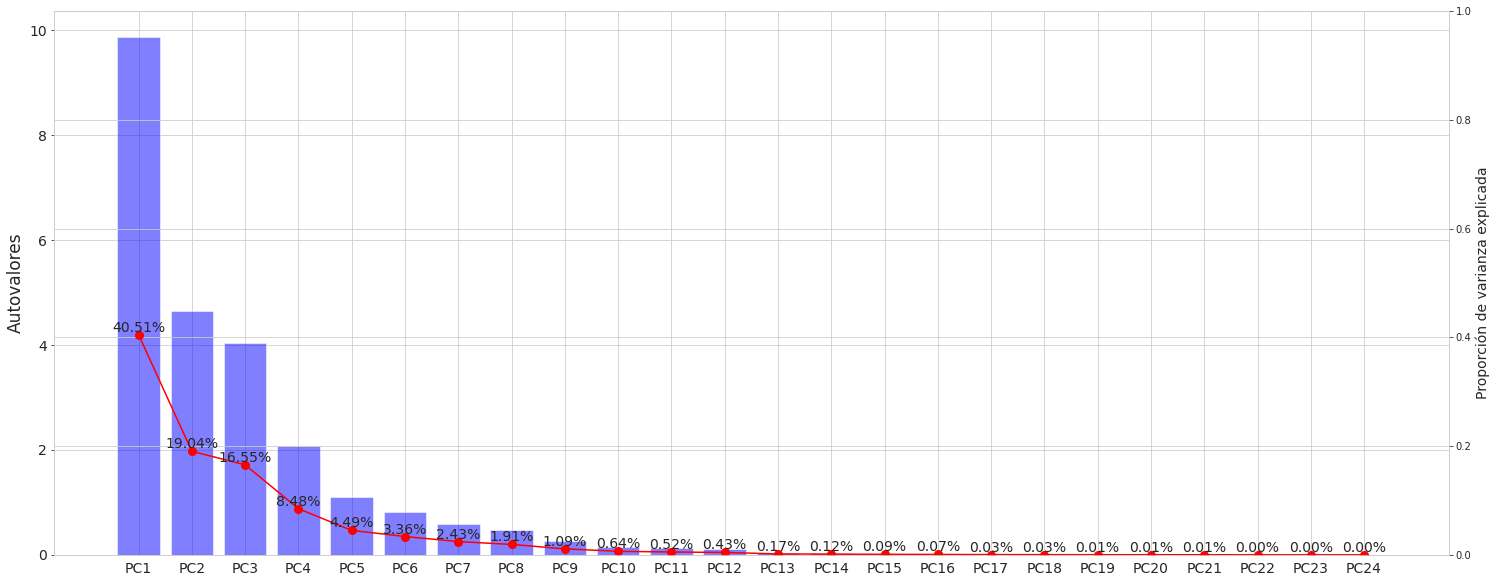

In [ ]:
# Obtener los autovalores y la proporción de varianza que explican
eigenvalues = fit.explained_variance_
prop_var = fit.explained_variance_ratio_

# Crear un gráfico de barras para representar los autovalores y la proporción de varianza que explican
x_ticks = np.arange(len(eigenvalues))
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(x_ticks, eigenvalues, color='b', alpha=0.5, align='center')
ax2 = ax.twinx()
ax2.plot(x_ticks, prop_var, color='r', marker='o', ms=8)
for i, v in enumerate(prop_var):
    ax2.text(i, v, "{:.2%}".format(v), ha='center', va='bottom', fontsize=14)
ax.set_xticks(x_ticks)
ax.set_xticklabels(['PC{}'.format(i+1) for i in range(len(eigenvalues))], fontsize=14)
ax.set_ylabel('Autovalores', fontsize=17)
ax2.set_ylabel('Proporción de varianza explicada', fontsize=14)
ax2.set_ylim([0, 1])
ax.tick_params(axis='both', which='major', labelsize=14)
plt.show()

De esta forma, parece razonable pensar en retener entre 3 o 6 Componentes Principales ya que a partir de ese número, el aumento de variabilidad explicada comienza a ser muy próximo a 0. Además, reteniendo este número de componentes principales se podría explicar mínimo aproximadamente el 76% de la variabilidad de los datos y máximo un 93%.

## ***3.6. RETENER EL NÚMERO DE COMPONENTES PRINCIPALES ÓPTIMO***

Tal y como se dijo en el apartado anterior, el número óptimo de Componentes Principales a retener estará entre 3 o 6. Para decidirnos atendemos al principio de parsimonia, que nos dará el modelo más sencillo de todos pero manteniendo una gran proporción de variabilidad explicada, por lo que se escoge retener 3 Componentes Principales.

In [ ]:
fit = PCA(n_components=3)
fit_transformed = fit.fit_transform(inn_dat2_scaled)

# Tabla de autovalores 
eig_df = pd.DataFrame({'Autovalores': fit.explained_variance_, 
                       'Porcentaje de varianza explicada': fit.explained_variance_ratio_,
                       'Porcentaje acumulado de varianza explicada': fit.explained_variance_ratio_.cumsum()})
from tabulate import tabulate
def print_stats(eig_df):
    print(tabulate(eig_df, headers='keys', tablefmt='fancy_grid'))
print_stats(eig_df)

╒════╤═══════════════╤════════════════════════════════════╤══════════════════════════════════════════════╕
│    │   Autovalores │   Porcentaje de varianza explicada │   Porcentaje acumulado de varianza explicada │
╞════╪═══════════════╪════════════════════════════════════╪══════════════════════════════════════════════╡
│  0 │       9.87125 │                           0.40507  │                                     0.40507  │
├────┼───────────────┼────────────────────────────────────┼──────────────────────────────────────────────┤
│  1 │       4.64054 │                           0.190426 │                                     0.595496 │
├────┼───────────────┼────────────────────────────────────┼──────────────────────────────────────────────┤
│  2 │       4.03408 │                           0.16554  │                                     0.761036 │
╘════╧═══════════════╧════════════════════════════════════╧══════════════════════════════════════════════╛


## ***3.7. RELACIÓN ENTRE LAS COMPONENTES PRINCIPALES Y LAS VARIABLES***

La relación entre variables numéricas se mide medante la covarianza entre dichas variables. 

Las covarianzas de cada componente principal y las variables vienen dadas por el producto de las coordenadas del vector propio que define la componente por el valor propio. 

La correlación entre una componente principal y una variable X es proporcional al coeficiente de esa variable en la definición del componente y la desviación típica de la variable.

In [ ]:
correlaciones = pd.DataFrame(fit.components_.T*np.sqrt(fit.explained_variance_), columns=['PC{}'.format(i) for i in range(1, fit.n_components_ + 1)], index=inn_dat2.columns)
from tabulate import tabulate
def print_stats(correlaciones):
    print(tabulate(correlaciones, headers='keys', tablefmt='fancy_grid'))
print_stats(correlaciones)

╒═════════════════╤════════════╤════════════╤════════════╕
│                 │        PC1 │        PC2 │        PC3 │
╞═════════════════╪════════════╪════════════╪════════════╡
│ N_EMPRESAS      │  0.654949  │ -0.0786803 │ -0.270301  │
├─────────────────┼────────────┼────────────┼────────────┤
│ PRODUCCION      │  0.926224  │  0.122057  │  0.184779  │
├─────────────────┼────────────┼────────────┼────────────┤
│ CI              │  0.834189  │  0.20492   │  0.0429812 │
├─────────────────┼────────────┼────────────┼────────────┤
│ VAB             │  0.839224  │ -0.108545  │  0.452182  │
├─────────────────┼────────────┼────────────┼────────────┤
│ REM_ASAL        │  0.910747  │  0.258552  │ -0.249332  │
├─────────────────┼────────────┼────────────┼────────────┤
│ IMPUESTOS       │ -0.0409475 │ -0.48567   │  0.838912  │
├─────────────────┼────────────┼────────────┼────────────┤
│ EBE_RM          │  0.500763  │ -0.303526  │  0.748569  │
├─────────────────┼────────────┼────────────┼───────────

Se observan en la tabla las correlaciones de las componentes con las variables, y aquella en la que obtengan un valor más alto para cada variable será con la que se vean mejor representadas las mismas. Por ejemplo:
- Las variables PRODUCCION, CI, VAB, REM_ASAL, PUESTOS, HORAS, EMPRESAS_INN, VENTAS_CE y COMPRAS_CE están muy bien representadas por la primera componente.
- Las variables INTENSIDAD_INN, ORDENADORES, ESPECIALISTAS, INTERNET, MEDIOS_SOCIALES, CLOUD, BIGDATA y SEGURIDAD están muy bien explicadas por la segunda componente.

## ***3.8. CALIDAD DE LA REPRESENTACIÓN***

Para medir si las nuevas variables recogen casi toda la información de las variables originales y estudiar de nuevo cuales están mejor o peor explicadas por las Componentes Principales se calcularán los cosenos al cuadrado que se calculan elvando las correlaciones al cuadrado y expresan la proporción de varianza de cada variable que es explicada por cada componente.

In [ ]:
cos2 = pd.DataFrame((fit.components_.T*np.sqrt(fit.explained_variance_))**2, columns=['PC{}'.format(i) for i in range(1, fit.n_components_ + 1)], index=inn_dat2.columns)
from tabulate import tabulate
def print_stats(cos2):
    print(tabulate(cos2, headers='keys', tablefmt='fancy_grid'))
print_stats(cos2)

╒═════════════════╤═══════════╤════════════╤═════════════╕
│                 │       PC1 │        PC2 │         PC3 │
╞═════════════════╪═══════════╪════════════╪═════════════╡
│ N_EMPRESAS      │ 0.428958  │ 0.00619059 │ 0.0730626   │
├─────────────────┼───────────┼────────────┼─────────────┤
│ PRODUCCION      │ 0.857891  │ 0.014898   │ 0.0341433   │
├─────────────────┼───────────┼────────────┼─────────────┤
│ CI              │ 0.695872  │ 0.0419923  │ 0.00184739  │
├─────────────────┼───────────┼────────────┼─────────────┤
│ VAB             │ 0.704297  │ 0.011782   │ 0.204469    │
├─────────────────┼───────────┼────────────┼─────────────┤
│ REM_ASAL        │ 0.82946   │ 0.0668492  │ 0.0621666   │
├─────────────────┼───────────┼────────────┼─────────────┤
│ IMPUESTOS       │ 0.0016767 │ 0.235875   │ 0.703773    │
├─────────────────┼───────────┼────────────┼─────────────┤
│ EBE_RM          │ 0.250764  │ 0.0921281  │ 0.560355    │
├─────────────────┼───────────┼────────────┼────────────


La suma de cada fila representa la proporción de variabilidad explicada por las 3 componentes para la variable (fila) correspondiente. Para ejemplificarlo se muestra la siguiente fórmula:

$Cos^2(CP_1, PRODUCCION)=Corr^2(CP_1, PRODUCCION)=0.86+0.015+0.034=0.909$

Por lo tanto, la variabilidad de la variable PRODUCCION es explicada en un     90.9% por las tres Componentes. 

Se pueden mostrar gráficamente con un mapa de calor:

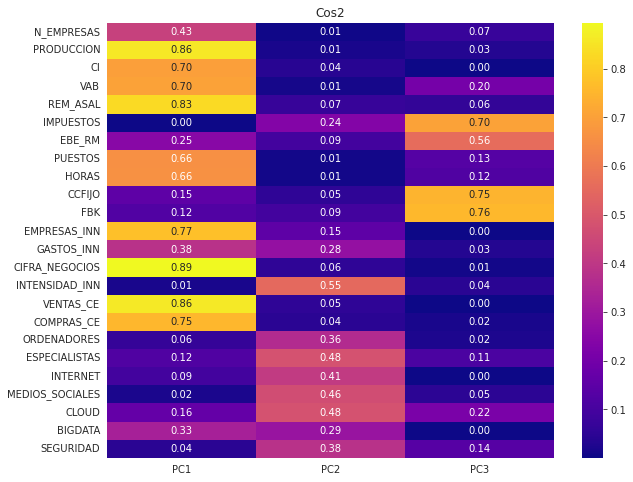

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cos2, cmap='plasma', annot=True, fmt=".2f")
plt.title('Cos2')
plt.show()

De esta forma podemos afirmar que:
- La **Componente 1** explica la variabilidad de las variables relacionadas con la Contabilidad Nacional y las relacionadas con el Comercio Electrónico, es decir, podrían resumirse como las características generales de cada una de las ramas de actividad económica estudiadas. La nueva variable podría llamarse **"Desempeño Económico y Empresarial"** ya que incluye variables relevantes para evaluar el desempeño de las empresas en términos económicos.
- La **Componente 2** explica la variabilidad de las variables relacionadas con los procesos de Innovación y podría resumirse en las características innovadoras de cada una de las ramas de actividad económica estudiadas. Por lo tanto, esta componente podría pasar a llamarse **"Digitalización y Tecnología"** ya que todas las variables que incluye están relacionadas con el uso de tecnologías de la información y la comunicación. De esta dorma podría medirse el grado de digitalización y tecnología de una empresa.
- La **Componente 3** explica la variabilidad de las variables IMPUESTOS, EBE_RM, CCFIJO y FBK, que también son variables incluídas en la Contabilidad Nacional. Sin embargo, incluye variables relacionadas con la gestión de recursos financieros así como otras relacionadas con la capacidad de generar beneficios. Por lo tanto, esta componente podría resumirse como **"Gestión de Recursos y Financiamiento"** incluyendo en ella variables que permiten evaluar la capacidad de crecimiento de la empresa para gestionar sus recursos y financiar su crecimiento.

Para encontrar que variables están peor explicadas en total por las tres componentes podemos utilizar el siguiente gráfico de barras y mostrar gráficamente la suma de los cosenos al cuadrado para cada una de las variables originales:

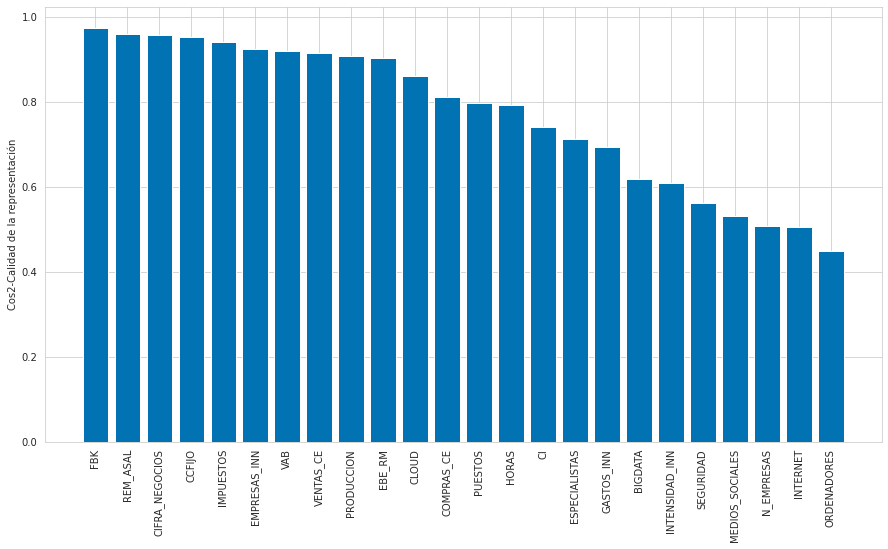

In [ ]:
cos2_sum = np.sum(cos2, axis=1)
indices_ordenados = np.argsort(cos2_sum)[::-1]
etiquetas = inn_dat2.columns
etiquetas_ordenadas = [etiquetas[i] for i in indices_ordenados]
cos2_sum_ordenados = cos2_sum[indices_ordenados]

# Creación del gráfico de barras
fig, ax = plt.subplots(figsize=(15, 8))
plt.bar(range(len(cos2_sum_ordenados)), cos2_sum_ordenados)
plt.xticks(range(len(cos2_sum_ordenados)), etiquetas_ordenadas, rotation=90)
plt.ylabel('Cos2-Calidad de la representación')
plt.show()

Gracias a este gráfico, puede decirse que las variables mejor representadas por las tres componentes son FBK, REM_ASAL, CIFRA_NEGOCIOS y CCFIJO. Sin embargo, las variables peor representadas son ORDENADORES, INTERNET y N_EMPRESAS aunque cabe destacar que su variabilidad está explicada en al menos un 50%. 

## ***3.9. VALORES DE LOS INDIVIDUOS EN LAS COMPONENTES PRINCIPALES Y CONCLUSIONES***

Una vez seleciconadas las direcciones de los ejes que explican la máxima variabilidad, se pasa a situar las observaciones sobre los nuevos ejes, luego tenemos que calcular sus nuevos valores. A la hora de calcular los valores de los individuos en las CP, si el análisis de Componentes principales parte de la matriz de Correlaciones, para obtener las coordenadas de los individuos tenemos que utilizar las variables estandarizadas.  

Además, se puede hacer una representación conjunta de las coordenadas de las observaciones junto con las nuevas variables en un gráfico de tipo Biplot.

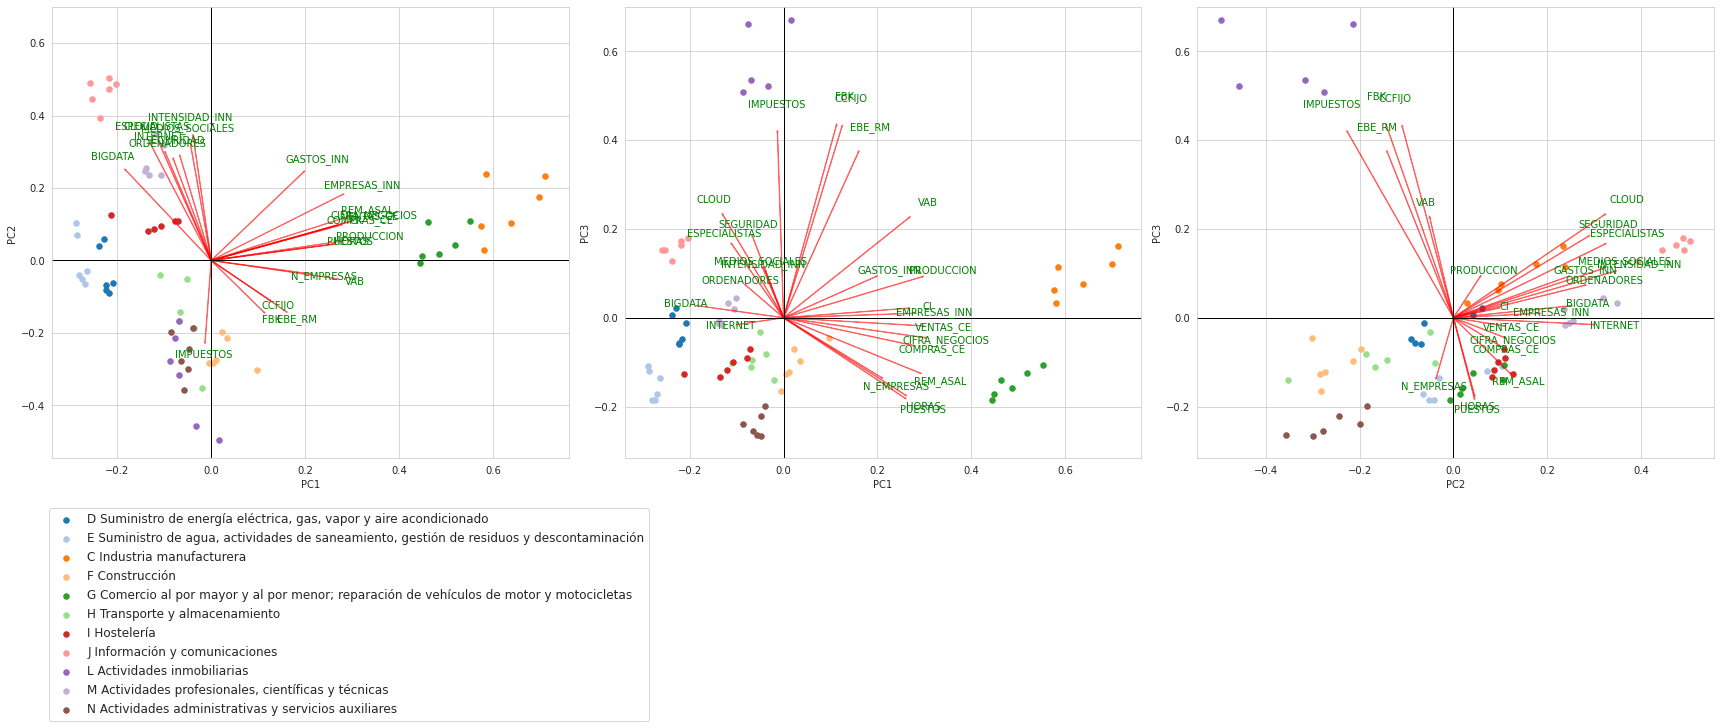

In [ ]:
ind_values = fit.transform(inn_dat2_scaled) # Coordenadas de los datos originales sobre las 3 CP

# Coordenadas de los datos originales sobre PC1, PC2 y PC3
pc1s = ind_values[:,0]
pc2s = ind_values[:,1]
pc3s = ind_values[:,2]

ejes_orig = np.transpose(fit.components_[:3, :]) # Vectores directores de los ejes originales proyectados sobre PC1 y PC2
n = ejes_orig.shape[0] # Numero de ejes del dataset original
etiquetas = list(inn_dat2.columns) # Nombres de los ejes (variables) originales

# Factor de escalado de los scores
escalado_1 = pc1s.max() - pc1s.min()
escalado_2 = pc2s.max() - pc2s.min()
escalado_3 = pc3s.max() - pc3s.min()

# Crear un arreglo de colores por cada categoría
unique_cats = inn_sin_faltantes['RAMA'].unique()
colores = {cat: plt.cm.tab20(i) for i, cat in enumerate(unique_cats)}

# Crear figura y arreglo de ejes de subparcelas
fig, axs = plt.subplots(1, 3, figsize=(24,7))

# Gráfico 1: Coordenadas de los datos originales sobre PC1 y PC2
for cat in unique_cats:
    mask = inn_sin_faltantes['RAMA'] == cat
    axs[0].scatter(pc1s[mask] / escalado_1, pc2s[mask] / escalado_2, s=30, color=colores[cat])
for i in range(n):
  axs[0].arrow(0, 0, ejes_orig[i,0], ejes_orig[i,1],color = 'r',alpha = 0.5)
  axs[0].text(ejes_orig[i,0]* 1.15, ejes_orig[i,1] * 1.15, etiquetas[i], color = 'g', ha = 'center', va = 'center')
axs[0].set_xlabel("PC2")
axs[0].set_xlabel("PC1")
axs[0].set_ylabel("PC2")
axs[0].set_ylim(top=0.7)
axs[0].axhline(0, color='black', lw=1)
axs[0].axvline(0, color='black', lw=1)

# Gráfico 2: Coordenadas de los datos originales sobre PC1 y PC3
for cat in unique_cats:
    mask = inn_sin_faltantes['RAMA'] == cat
    axs[1].scatter(pc1s[mask] / escalado_1, pc3s[mask] / escalado_3, s=30, color=colores[cat])
for i in range(n):
  axs[1].arrow(0, 0, ejes_orig[i,0], ejes_orig[i,2],color = 'r',alpha = 0.5)
  axs[1].text(ejes_orig[i,0]* 1.15, ejes_orig[i,2] * 1.15, etiquetas[i], color = 'g', ha = 'center', va = 'center')
axs[1].set_xlabel("PC1")
axs[1].set_ylabel("PC3")
axs[1].set_ylim(top=0.7)
axs[1].axhline(0, color='black', lw=1)
axs[1].axvline(0, color='black', lw=1)

# Gráfico 3: Coordenadas de los datos originales sobre PC2 y PC3
for cat in unique_cats:
    mask = inn_sin_faltantes['RAMA'] == cat
    axs[2].scatter(pc2s[mask] / escalado_2, pc3s[mask] / escalado_3, s=30, color=colores[cat])
for i in range(n):
  axs[2].arrow(0, 0, ejes_orig[i,1], ejes_orig[i,2],color = 'r',alpha = 0.5)
  axs[2].text(ejes_orig[i,1]* 1.15, ejes_orig[i,2]* 1.15, etiquetas[i], color = 'g', ha = 'center', va = 'center')
axs[2].set_xlabel("PC2")
axs[2].set_ylabel("PC3")
axs[2].set_ylim(top=0.7)
axs[2].axhline(0, color='black', lw=1)
axs[2].axvline(0, color='black', lw=1)

legend = fig.legend([cat for cat in unique_cats], loc='lower left', bbox_to_anchor=(0.027, -0.45), ncol=1, fontsize=12) # Crear leyenda
fig.tight_layout(rect=[0, 0, 1, 1]) # Ajustar tamaño del gráfico para dejar espacio para la leyenda
plt.show()

Para poder sacar conclusiones repecto a las ramas de actividad, se han representado las observaciones para los distintos años de cada una de ellas en colores concretos que las representen. De esta forma, aquellas más próximas a una variable tendrán un valor alto para la misma. Sin embargo, aquellas ramas en la misma dirección pero sentido opuesto tendrán un valor bajo de dicha variable. 

Fijándo la atención en las variables, los ángulos agudos entre las mismas indican correlación positiva. Por lo tanto, si el ángulo es de 90º significará que esas variables están incorreladas.

Fijándonos en el primero de los gráficos, se afianza la idea de que las variables relacionadas con la Innovación están explicadas por la Componente 2 y aquellas relacionadas con la Contabilidad Nacional, están mejor explicadas por la Componente 1. Sin embargo, algunas de ellas como IMPUESTOS, CCFIJO, FBK o EBE_RM no parecen estar explicadas por ninguna de las dos, pero fijándonos en los otros dos gráficos, se observa que están explicadas por la Componente 3. 

En cuanto a las observaciones, se ve que hay grupos de ellas con valores más altos para unas u otras variables y por lo tanto para las componentes. Podemos concluir que:

*  Las ramas de actividad económica **J Información y comunicaciones y M Actividades profesionales, científicas y técnicas** tienen coordenadas por debajo de la media para la componente principal Desempeño Económico y Empresarial, coordenadas altas para la componente principal Digitalización y Tecnología y coordenadas muy cercanas a la media para la componente Gestión de Recursos y Financiación. En este caso, estamos hablando de dos ramas de actividad que tienen un desempeño por debajo de la media en términos económicos y empresariales, lo que sugiere que tienen dificultades para generar ganancias y pueden estar luchando para mantenerse competitivos en el mercado. Sin embargo, ambas tienen una fuerte adopción de tecnología y digitalización, lo que sugiere que están utilizando la tecnología para mejorar su eficiencia y procesos. En cuanto a la gestión de recursos y financiamiento, ambas ramas de actividad están muy cercanas a la media, lo que sugiere que están administrando sus recursos y finanzas de manera efectiva, pero aún tienen espacio para mejorar en este ámbito.

*   Las ramas de actividad económica **C Industria manufacturera y G Comercio al por mayor y al por menor; reparación de vehículos de motor y motocicletas** tienen coordenadas altas para la componente principal Desempeño Económico y Empresarial, coordenadas por encima de la media pero no excesivamente para la componente principal Digitalización y Tecnología y la primera tiene coordenadas por encima de la media para la componente Gestión de Recursos y Financiamiento y la segunda por debajo de la media. En general, basándonos en el valor de las anteriores coordenadas, podríamos decir que ambas ramas de actividad tienen un buen desempeño económico y empresarial, pero la C Industria manufacturera destaca por su mejor gestión de recursos y financiamiento, lo que sugiere que ha tomado mejores decisiones financieras y ha logrado un mayor rendimiento de sus inversiones que G Comercio al por mayor y al por menor; reparación de vehículos de motor y motocicletas. En cuanto a la digitalización y tecnología, ambas ramas de actividad tienen espacio para mejorar y adoptar nuevas tecnologías para mejorar su competitividad y eficiencia.

*   Las ramas de actividad **D Suministro de energía eléctrica, gas, vapor y aire acondicionado, E Suministro de agua, actividades de saneamiento, gestión de recursos y descontaminación e I Hostelería** tienen coordenadas por debajo de la media pero muy cercanas a ella para la componente principal Desempeño Económico y Empresarial, coordenadas totalmente medias para la componente principal Digitalización y Tecnología y coordenadas por debajo de la media pero cercanas a ella para la componente Gestión de Recursos y Financiación. Esto significa que podemos interpretar que estas tres ramas de actividad están en una situación desafiante en términos económicos y empresariales, pero están utilizando la tecnología para mejorar sus procesos. Para mejorar su desempeño económico, pueden necesitar revisar sus estrategias financieras y encontrar formas de administrar mejor sus recursos y maximizar su rentabilidad.

*   Las ramas de actividad **H Transportes y almacenamiento, F Construcción, L Actividades inmobiliarias y N Actividades administrativas y servicios auxiliares**, tienen coordenadas totalmente medias para la componente principal Desempeño Económico y Empresarial, coordenadas bajas para la componente principal Digitalización y Tecnología pero, para la última componente Gestión de Recursos y Financiación la rama L Actividades inmobiliarias tiene coordenadas muy altas y H Transportes y almacenamiento, F Construcción y N Actividades administrativas y servicios tienen coordenadas medias pero por debajo de ella para la misma. Podemos interpretar que estas cuatro ramas de actividad están generando ganancias y son relativamente competitivas en el mercado, pero están perdiendo oportunidades para mejorar su eficiencia y procesos al no adoptar tecnología y digitalización. Las ramas H Transportes y almacenamiento, F Construcción y N Actividades administrativas y servicios pueden necesitar revisar sus estrategias financieras para administrar mejor sus recursos y maximizar su rentabilidad, mientras que la rama L Actividades inmobiliarias ha logrado establecer estrategias efectivas en este ámbito.

Por último, obtenemos el conjunto de datos final con las nuevas coordenadas, y como complemento a estos últimos gráficos y para comprender mejor la evolución de los indicadores a lo largo de los 6 años seleccionados, se construirá un gráfico dinámico:

In [ ]:
inn_cp = pd.DataFrame(ind_values, columns=['RENDIMIENTO', 'TECNOLOGIA', 'GESTION'])
inn_cp.insert(0, 'ID', range(1, len(inn_cp) + 1))
inn_cp = pd.merge(inn_sin_faltantes, inn_cp, on='ID') # Unimos los dataframes por medio de la variable común "ID"
inn_cp = inn_cp.iloc[:, :3].join(inn_cp.iloc[:, -3:]) # Seleccionamos las tres primeras y tres últimas variables del dataframe
inn_cp.head()

,ID,RAMA,YEAR,RENDIMIENTO,TECNOLOGIA,GESTION
0,1,"D Suministro de energía eléctrica, gas, vapor ...",2015,-2.483127,-0.611316,-0.518544
1,2,"E Suministro de agua, actividades de saneamien...",2015,-3.123199,-0.359681,-1.640307
2,3,C Industria manufacturera,2015,6.448818,0.263638,0.293162
3,4,F Construcción,2015,-0.054266,-2.511459,-1.461056
4,5,G Comercio al por mayor y al por menor; repara...,2015,4.943743,-0.057219,-1.659417


In [ ]:
#Creamos la lista de fotogramas vacía:
fotogramas = []

#Creamos el bucle for que pasará por todos los años y dibujamos los gráficos:
years = list(range(2015, 2021))
for i in range(len(years)):
    data_years = inn_cp[inn_cp['YEAR'].isin(years[:i+1])] # Filtrar datos para los años correspondientes
    fig, ax = plt.subplots(1, 1, figsize=(17, 11))
    for rama, color in colores.items():
        mask = data_years['RAMA'] == rama
        ax.scatter(data_years[mask]['RENDIMIENTO'], data_years[mask]['TECNOLOGIA'], color=color, label=rama, s=320)
        ax.plot(data_years[mask]['RENDIMIENTO'], data_years[mask]['TECNOLOGIA'], color=color, lw=2)
    if i == 0:
        ax.set_title(f'EVOLUCIÓN AÑO {years[i]}', pad = 20, fontdict={"fontsize":25})
    else:
        ax.set_title(f'EVOLUCIÓN AÑO {years[0]}-{years[i]}', pad = 20, fontdict={"fontsize":25})
    ax.set_xlabel('RENDIMIENTO', fontdict={"fontsize":25})
    ax.set_ylabel('TECNOLOGIA', fontdict={"fontsize":25})
    ax.set_xlim(-5, 9)
    ax.set_ylim(-6, 6)
    ax.tick_params(axis='both', which='major', width=2, labelsize=14)
    ax.tick_params(axis='both', which='minor', width=1, labelsize=12)
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    legend = fig.legend(*ax.get_legend_handles_labels(), loc='right', bbox_to_anchor=(1.45, 0.5), ncol=1, fontsize=13, markerscale=0.9)
    plt.close(fig)

#Parte 1 para la creación del GIF:
    import PIL
    import io
    f = io.BytesIO() #Creamos un objeto que va a contener elementos binarios (compuestos internamente por ceros y unos)
    imagen = ax.get_figure() #Vamos "capturando", uno a uno, los gráficos que vamos creando
    imagen.savefig(f, #Guadamos la información de cada gráfico
                   format="png", #Guardamos los gráficos en formato .png
                   bbox_inches="tight") #Esta línea de código se utiliza para que el contorno de las imágenes se ajusten al tamaño del gráfico
    f.seek(0) #Inicializamos el objeto con información binaria
    fotogramas.append(PIL.Image.open(f)) # con append() vamos añadiendo cada gráfico a la lista de fotogramas.

#IMPORTANTE: ya estamos fuera del bucle:
fotogramas[0].save("Gráfico dinámico evolucion RENDIMIENTO y TECNOLOGIA.gif", #Damos nombre al archivo
                   format="GIF", #Vamos a crear un GIF
                   append_images = fotogramas[1:], #Añadimos los gráficos de la lista fotogramas (empezamos por el segundo (número 1), porque el primero (número 0) ya lo hemos añadido)
                   save_all = True,
                   duration = 1700, #Duración en milisegundos del GIF
                   loop=0) #Con esta opción hacemos que, una vez que el GIF acabe, vuelva a empezar, y así indefinidamente.

f.close() #Cerramos el archivo binario (ya no se puede modificar)

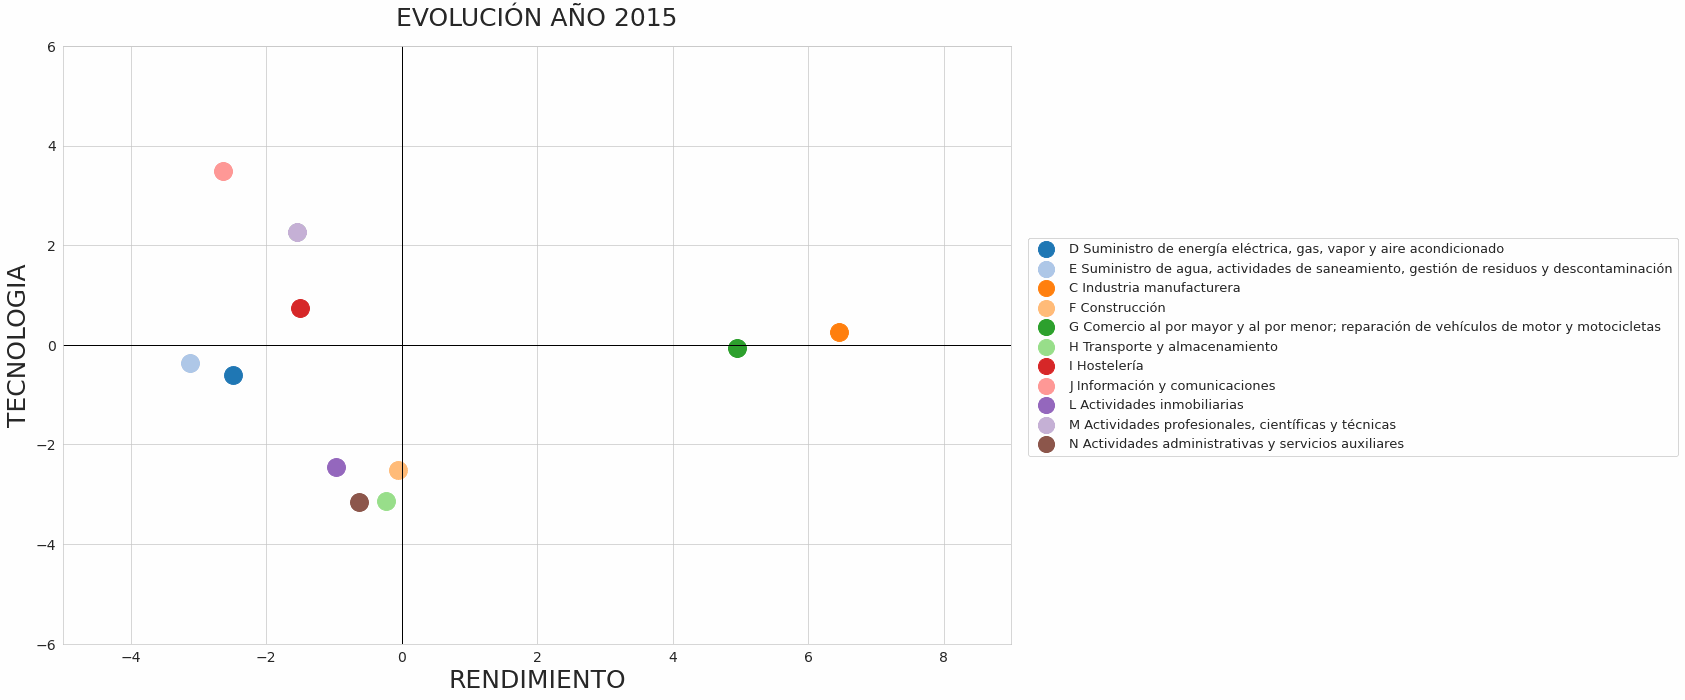

In [ ]:
from IPython.display import Image
#from matplotlib import animation
Image(open("/content/Gráfico dinámico evolucion RENDIMIENTO y TECNOLOGIA.gif", "rb").read())

En el gráfico de dispersión dinámico se observa la evolución a lo largo de los seis años seleccionados de los indicadores de RENDIMIENTO y TECNOLOGÍA ya que eran las componentes que mejor explicaban las variables originales.

Utilizando las agrupaciones anteriormente especificadas para describir las características de las diferentes ramas de actividad económica puede ofrecerse la siguiente interpretación de la evolución de las mismas:

*  Las ramas de actividad económica **J Información y comunicaciones y M Actividades profesionales, científicas y técnicas** experimentan una evolución similar a lo largo del periodo de tiempo seleccionado. Más concretamente, se observa que su desarrollo tecnológico y su rendimiento empresarial aumentan ligeramente a medida que transcurren los años.

*   Las ramas de actividad económica **C Industria manufacturera y G Comercio al por mayor y al por menor; reparación de vehículos de motor y motocicletas** presentan un comportamiento muy similar durante el periodo de tiempo analizado. En particular, se observa un aumento significativo en su rendimiento empresarial y desarrollo tecnológico.

*   Las ramas de actividad **D Suministro de energía eléctrica, gas, vapor y aire acondicionado, E Suministro de agua, actividades de saneamiento, gestión de recursos y descontaminación e I Hostelería**  presentaron comportamientos distintos en el periodo de tiempo estudiado. Mientras que las ramas de actividad D Suministro de energía eléctrica, gas, vapor y aire acondicionado y E Suministro de agua, actividades de saneamiento, gestión de recursos y descontaminación mantuvieron un rendimiento y desarrollo tecnológico constante hasta el año 2019, en dicho año experimentaron un gran avance tecnológico, alcanzando el nivel de innovación de la rama I Hostelería. Por su parte, esta rama mantuvo un crecimiento constante en su rendimiento empresarial, pero su desarrollo tecnológico no aumentó significativamente. Sin embargo, a partir del año 2020, la pandemia del COVID-19 afectó drásticamente a su rendimiento económico haciendolo disminuir significativamente.

*   Las ramas de actividad **H Transportes y almacenamiento, F Construcción, L Actividades inmobiliarias y N Actividades administrativas y servicios auxiliares** mantienen un crecimiento ligero en cuanto a su rendimiento económico durante el periodo de tiempo estudiado exceptuando la rama H Transportes y almacenamiento que en el año 2020 sufre una disminución del mismo debido a la pandemia del COVID-19. En cuanto a su desarrollo tecnológico, cada rama de actividad tuvo un comportamiento diferente. La rama F Construcción aumentó su desarrollo tecnológico durante estos años salvo en el año 2020, cuando alcanzó niveles más bajos que en 2015. La rama H Transportes y almacenamiento experimentó un aumento significativo en su desarrollo tecnológico durante estos años, llegando incluso a estar muy cerca de los niveles medios del resto de los sectores. Las ramas L Actividades inmobiliarias y N Actividades administrativas y servicios auxiliares intercalaron años de crecimiento y decrecimiento en su desarrollo tecnológico, pero en esta última rama los cambios fueron menos abruptos y las disminuciones menores que en la otra rama.


Finalmente, después de realizar este análisis de componentes principales exhaustivo, podemos tener una comprensión más clara del comportamiento económico y tecnológico de las diferentes ramas de actividad, así como su evolución desde 2015 hasta 2020. Al reducir la cantidad de variables disponibles, podemos obtener una interpretación más sencilla y fácilmente comprensible de la realidad.